In [1]:
%matplotlib inline

:::{admonition} Download
:class: important render-all

This notebook can be downloaded as **{nb-download}`fundamentals_of_pynapple.ipynb`**. See the button at the top right to download as markdown or pdf.
:::


<div class="render-all">

# Learning the fundamentals of pynapple

## Learning objectives


- Instantiate the pynapple objects
- Make the pynapple objects interact
- Use numpy with pynapple
- Slicing pynapple objects
- Adding metadata to pynapple objects
- Learn the core functions of pynapple

The pynapple documentation can be found [here](https://pynapple.org).

The documentation for objects and method of the core of pynapple is [here](https://pynapple.org/api.html).


Let's start by importing the pynapple package and matplotlib to see if everything is correctly installed.
If an import fails, you can do `!pip install pynapple matplotlib` in a cell to fix it.

</div>

In [2]:
import pynapple as nap
import matplotlib.pyplot as plt
import numpy as np
import workshop_utils

/home/agent/workspace/rorse_ccn-software-jan-2025_main/lib/python3.11/site-packages/nemos/_documentation_utils/plotting.py:38: UserWarning: plotting functions contained within `_documentation_utils` are intended for nemos's documentation. Feel free to use them, but they will probably not work as intended with other datasets / in other contexts.
  warnings.warn(


For this notebook we will work with fake data. The following cells generate a set of variables that we will use to create the different pynapple objects.

In [3]:
var1 = np.random.randn(100) # Variable 1
tsp1 = np.arange(100) # The timesteps of variable 1

var2 = np.random.randn(100, 3) # Variable 2
tsp2 = np.arange(0, 100, 1) # The timesteps of variable 2
col2 = ['pineapple', 'banana', 'tomato'] # The name of each columns of var2

var3 = np.random.randn(1000, 4, 5) # Variable 3
tsp3 = np.arange(0, 100, 0.1) # The timesteps of variable 3

random_times_1 = np.array([3.14, 37.0, 42.0])
random_times_2 = np.array([10, 25, 50, 70])
random_times_3 = np.sort(np.random.uniform(10, 80, 100))

starts_1 = np.array([10000, 60000, 90000]) # starts of an epoch in `ms`
ends_1 = np.array([20000, 80000, 95000]) # ends in `ms`

## Instantiate pynapple objects 

This is a lot of variables to carry around. pynapple can help reduce the size of the workspace. Here we will instantiate all the different pynapple objects with the variables created above.

Let's start with the simple ones.

<div class="render-all">

**Question:** Can you instantiate the right pynapple objects for `var1`, `var2` and `var3`? Objects should be named respectively `tsd1`, `tsd2` and `tsd3`. Don't forget the column name for `var2`.

</div>

In [4]:
tsd1 = nap.Tsd(t=tsp1, d=var1)
tsd2 = nap.TsdFrame(t=tsp2, d=var2, columns = col2)
tsd3 = nap.TsdTensor(t=tsp3, d=var3)

<div class="render-all">

**Question:** Can you print `tsd1`?

</div>

In [5]:
print(tsd1)

Time (s)
----------  ----------
0.0          1.51292
1.0          0.0155563
2.0         -2.14895
3.0         -0.940132
4.0          0.129806
5.0         -1.05994
6.0         -0.219335
...
93.0         0.543679
94.0        -1.73064
95.0        -0.523741
96.0        -0.419869
97.0        -0.626192
98.0        -0.516779
99.0        -0.781057
dtype: float64, shape: (100,)


<div class="render-all">

**Question:** Can you print `tsd2`?

</div>

In [6]:
print(tsd2)

Time (s)    pineapple    banana    tomato
----------  -----------  --------  --------
0.0         -0.16008     -0.16467  -1.55792
1.0         0.07389      -0.37121  -1.5027
2.0         0.67231      -0.40303  -1.98381
3.0         0.17873      0.04138   -0.7381
4.0         -0.58583     -1.18687  -0.99969
5.0         2.23034      1.04542   -0.95841
6.0         -0.58179     0.12827   0.84646
...         ...          ...       ...
93.0        0.45044      0.58543   -1.2812
94.0        -0.25131     0.24594   2.36248
95.0        -0.93021     -0.25047  0.3053
96.0        0.41452      -0.51393  0.5251
97.0        0.14909      0.55242   0.3006
98.0        1.60397      1.2947    -0.66551
99.0        1.58099      1.29545   -0.35986
dtype: float64, shape: (100, 3)


<div class="render-all">

**Question:** Can you print `tsd3`?

</div>

In [7]:
print(tsd3)

Time (s)
----------  -------------------------------
0.0         [[-1.51475  ...  0.582355] ...]
0.1         [[ 0.050259 ... -0.635568] ...]
0.2         [[-1.56171  ...  0.844647] ...]
0.3         [[-0.097491 ... -0.638654] ...]
0.4         [[-1.167455 ... -0.539714] ...]
0.5         [[0.162718 ... 0.506239] ...]
0.6         [[0.461918 ... 1.894334] ...]
...
99.3        [[-1.88854  ...  0.781344] ...]
99.4        [[-1.087333 ... -0.315887] ...]
99.5        [[-0.009822 ...  0.105625] ...]
99.6        [[ 2.191747 ... -0.115332] ...]
99.7        [[-1.292445 ... -0.538872] ...]
99.8        [[ 0.539539 ... -0.521138] ...]
99.9        [[-1.161908 ... -1.254522] ...]
dtype: float64, shape: (1000, 4, 5)


<div class="render-all">

**Question:** Can you create an `IntervalSet` called `ep` out of `starts_1` and `ends_1` and print it? Be careful, times given above are in `ms`.

</div>

In [8]:
ep = nap.IntervalSet(start=starts_1, end=ends_1, time_units='ms')
print(ep)

  index    start    end
      0       10     20
      1       60     80
      2       90     95
shape: (3, 2), time unit: sec.


<div class="render-all">

The experiment generated a set of timestamps from 3 different channels.

**Question:** Can you instantiate the corresponding pynapple object (`ts1`, `ts2`, `ts3`) for each one of them?

</div>

In [9]:
ts1 = nap.Ts(t=random_times_1)
ts2 = nap.Ts(t=random_times_2)
ts3 = nap.Ts(t=random_times_3)

<div class="render-all">

This is a lot of timestamps to carry around as well.

**Question:** Can you instantiate the right pynapple object (call it `tsgroup`) to group them together?

</div>

In [10]:
tsgroup = nap.TsGroup({0:ts1, 1:ts2, 2:ts3})

<div class="render-all">

**Question:** ... and print it?

</div>

In [11]:
print(tsgroup)

  Index     rate
-------  -------
      0  0.03908
      1  0.05211
      2  1.30264


## Interaction between pynapple objects 

We reduced 12 variables in our workspace to 5 using pynapple. Now we can see how the objects interact.

<div class="render-all">

**Question:** Can you print the `time_support` of `tsgroup`?

</div>

In [12]:
print(tsgroup.time_support)

  index    start      end
      0     3.14  79.9071
shape: (1, 2), time unit: sec.


The experiment ran from 0 to 100 seconds and as you can see, the `TsGroup` object shows the rate. But the rate is not accurate as it was computed over the default `time_support`.

<div class="render-all">

**Question:** can you recreate the `tsgroup` object passing the right `time_support` during initialisation?

</div>

In [13]:
tsgroup = nap.TsGroup({0:ts1, 1:tsd2, 2:ts3}, time_support = nap.IntervalSet(0, 100))

<div class="render-all">

**Question:** Can you print the `time_support` and `rate` to see how they changed?

</div>

In [14]:
print(tsgroup.time_support)
print(tsgroup.rate)

  index    start    end
      0        0    100
shape: (1, 2), time unit: sec.
0    0.03
1    1.00
2    1.00
Name: rate, dtype: float64


<div class="render-all">

Now you realized the variable `tsd1` has some noise. The good signal is between 10 and 30 seconds and  50 and 100.

**Question:** Can you create an `IntervalSet` object called `ep_signal` and use it to restrict the variable `tsd1`?

</div>

In [15]:
ep_signal = nap.IntervalSet(start=[10, 50], end=[30, 100])

tsd1 = tsd1.restrict(ep_signal)

<div class="render-all">
You can print `tsd1` to check that the timestamps are in fact within `ep`.
You can also check the `time_support` of `tsd1` to see that it has been updated.
</div>

In [16]:
print(tsd1)
print(tsd1.time_support)

Time (s)
----------  ---------
10.0        -1.17392
11.0        -1.89974
12.0         0.826239
13.0         1.06981
14.0        -1.24952
15.0         2.29172
16.0        -0.307293
...
93.0         0.543679
94.0        -1.73064
95.0        -0.523741
96.0        -0.419869
97.0        -0.626192
98.0        -0.516779
99.0        -0.781057
dtype: float64, shape: (71,)
  index    start    end
      0       10     30
      1       50    100
shape: (2, 2), time unit: sec.


In [17]:
ep_tmp = nap.IntervalSet(np.sort(np.random.uniform(0, 100, 20)))
print(ep_tmp)

  index     start       end
      0   1.39415   1.92985
      1   7.24709  23.4866
      2  28.6185   47.9403
      3  52.1102   54.6987
      4  58.1249   68.1296
      5  79.5894   80.4099
      6  82.1095   84.1959
      7  86.9496   91.7275
      8  94.5107   95.4808
      9  97.459    99.3186
shape: (10, 2), time unit: sec.


<div class="render-all">

**Question:** Can you do the intersection of `ep_signal` and `ep_tmp`?
</div>

In [18]:
print(ep_signal.intersect(ep_tmp))

  index    start      end
      0  10       23.4866
      1  28.6185  30
      2  52.1102  54.6987
      3  58.1249  68.1296
      4  79.5894  80.4099
      5  82.1095  84.1959
      6  86.9496  91.7275
      7  94.5107  95.4808
      8  97.459   99.3186
shape: (9, 2), time unit: sec.


<div class="render-all">
You can visualize IntervalSet using the function `workshop_utils.visualize_intervals` we provide.
</div>

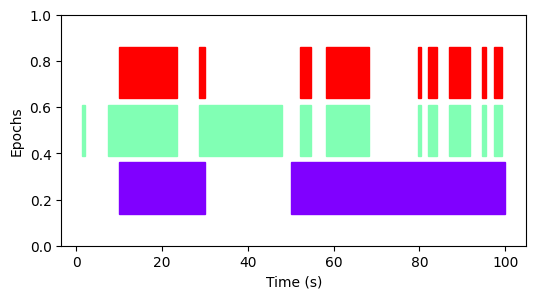

In [19]:
workshop_utils.visualize_intervals([ep_signal, ep_tmp, ep_signal.intersect(ep_tmp)])

<div class="render-all">

**Question:** Can you do the union of `ep_signal` and `ep_tmp`?
</div>

In [20]:
print(ep_signal.union(ep_tmp))

  index     start        end
      0   1.39415    1.92985
      1   7.24709   47.9403
      2  50        100
shape: (3, 2), time unit: sec.


<div class="render-all">

**Question:** ... and visualize it?
</div>

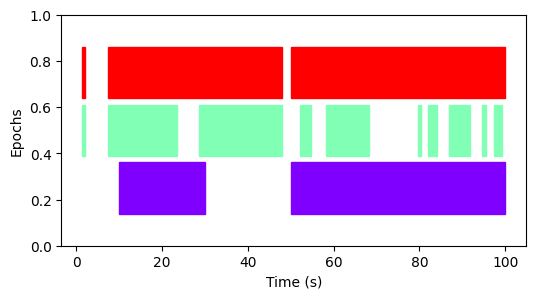

In [21]:
workshop_utils.visualize_intervals([ep_signal, ep_tmp, ep_signal.union(ep_tmp)])

<div class="render-all">

**Question:** Can you do the difference of `ep_signal` and `ep_tmp`?
</div>

In [22]:
print(ep_signal.set_diff(ep_tmp))

  index    start       end
      0  23.4866   28.6185
      1  50        52.1102
      2  54.6987   58.1249
      3  68.1296   79.5894
      4  80.4099   82.1095
      5  84.1959   86.9496
      6  91.7275   94.5107
      7  95.4808   97.459
      8  99.3186  100
shape: (9, 2), time unit: sec.


<div class="render-all">

**Question:** ... and visualize it?
</div>

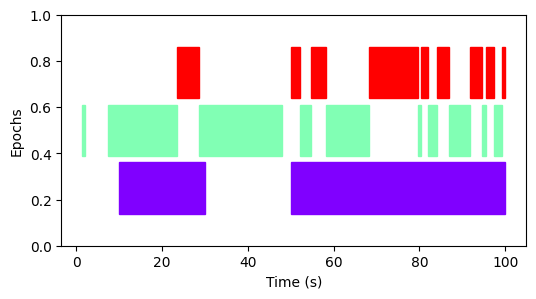

In [23]:
workshop_utils.visualize_intervals([ep_signal, ep_tmp, ep_signal.set_diff(ep_tmp)])

## Numpy & pynapple

<div class="render-all">

Pynapple objects behaves very similarly like numpy array. They can be sliced with the following syntax :

  `tsd[0:10] # First 10 elements`

Arithmetical operations are available as well :

  `tsd = tsd + 1`

Finally numpy functions works directly. Let's imagine `tsd3` is a movie with frame size (4,5).

**Question:** Can you compute the average frame along the time axis using `np.mean` and print the result?

</div>

In [24]:
print(np.mean(tsd3, 0))

[[ 0.04661613 -0.00955973 -0.00103755 -0.00076147 -0.00546818]
 [ 0.02294352  0.01364822  0.03108225 -0.03141721  0.04286493]
 [-0.01053961  0.01621524  0.04439855  0.0496056   0.00697254]
 [-0.0199557   0.03611475 -0.01350142  0.01518936  0.00524639]]


<div class="render-all">

**Question:**: can you compute the average of `tsd2` for each timestamps and print it?
</div>

In [25]:
print(np.mean(tsd2, 1))

Time (s)
----------  ----------
0.0         -0.627556
1.0         -0.60001
2.0         -0.571507
3.0         -0.172665
4.0         -0.92413
5.0          0.77245
6.0          0.130982
...
93.0        -0.0817746
94.0         0.785706
95.0        -0.291795
96.0         0.141899
97.0         0.334036
98.0         0.744388
99.0         0.83886
dtype: float64, shape: (100,)


Notice how the output in the second case is still a pynapple object.
In most cases, applying a numpy function will return a pynapple object if the time index is preserved.

## Slicing pynapple objects 

Multiple methods exists to slice pynapple object. This parts reviews them.

`IntervalSet` also behaves like numpy array.

<div class="render-all">

**Question:** Can you extract the first and last epoch of `ep` in a new `IntervalSet`?
</div>

In [26]:
print(ep[[0,2]])

  index    start    end
      0       10     20
      1       90     95
shape: (2, 2), time unit: sec.


<div class="render-all">

Sometimes you want to get a data point as close as possible in time to another timestamps.

**Question:** Using the `get` method, can you get the data point from `tsd3` as close as possible to the time 50.1 seconds?

</div>

In [27]:
print(tsd3.get(50.1))

[[ 0.08352735 -1.12983986  1.30781808 -0.01904838 -0.30538619]
 [-0.48254184  2.03151853  0.36879669  1.12057643 -0.20189989]
 [-0.01076454  0.22067091 -0.14597076 -0.99818046 -0.91833465]
 [ 0.56967342 -0.35468796  0.66580719  3.43562803 -0.51249259]]


## Metadata

<div class="render-all">

Metadata are ubiquitous in neuroscience. They can be added to 3 pynapple objects :

- `TsGroup` : to label neurons in electrophysiology
- `IntervalSet` : to label intervals
- `TsdFrame` : to label neurons in calcium imaging


**Question:** Can you run the following command `tsgroup['planet'] = ['mars', 'venus', 'saturn']`
</div>

In [28]:
tsgroup['planet'] = ['mars', 'venus', 'saturn']

<div class="render-all">

**Question:** ... and print it?
</div>

In [29]:
print(tsgroup)

  Index    rate  planet
-------  ------  --------
      0    0.03  mars
      1    1     venus
      2    1     saturn


<div class="render-all">

The object `ep` has 3 epochs labelled `['left', 'right', 'left']`. 

**Question:** Can you add them as a metadata column called `direction`?

</div>

In [30]:
ep['direction'] = ['left', 'right', 'left']
print(ep)

  index    start    end  direction
      0       10     20  left
      1       60     80  right
      2       90     95  left
shape: (3, 2), time unit: sec.


<div class="render-all">

The object `tsd2` has 3 columns. Each column correspond to the rgb colors `[(0,0,1), (0.5, 0.5, 1), (0.1, 0.2, 0.3)]`. 

**Question:** Can you add them as metadata of `tsd2`?
</div>

In [31]:
tsd2['colors'] = [(0,0,1), (0.5, 0.5, 1), (0.1, 0.2, 0.3)]
print(tsd2)

Time (s)    pineapple    banana         tomato
----------  -----------  -------------  ---------------
0.0         -0.16008     -0.16467       -1.55792
1.0         0.07389      -0.37121       -1.5027
2.0         0.67231      -0.40303       -1.98381
3.0         0.17873      0.04138        -0.7381
4.0         -0.58583     -1.18687       -0.99969
5.0         2.23034      1.04542        -0.95841
6.0         -0.58179     0.12827        0.84646
...         ...          ...            ...
93.0        0.45044      0.58543        -1.2812
94.0        -0.25131     0.24594        2.36248
95.0        -0.93021     -0.25047       0.3053
96.0        0.41452      -0.51393       0.5251
97.0        0.14909      0.55242        0.3006
98.0        1.60397      1.2947         -0.66551
99.0        1.58099      1.29545        -0.35986
Metadata
--------    --------     --------       --------
colors      (0, 0, 1)    (0.5, 0.5, 1)  (0.1, 0.2, 0.3)

dtype: float64, shape: (100, 3)


<div class="render-all">

You can also add metadata at initialization as a dictionnary using the keyword argument `metadata` : 
</div>

In [32]:
tsgroup = nap.TsGroup({0:ts1, 1:ts2, 2:ts3}, metadata={'planet':['mars','venus', 'saturn']})

print(tsgroup)

  Index     rate  planet
-------  -------  --------
      0  0.03908  mars
      1  0.05211  venus
      2  1.30264  saturn


<div class="render-all">

Metadata are accessible either as attributes (i.e. `tsgroup.planet`) or as dictionnary-like keys (i.e. `ep['direction']`).

They can be used to slice objects. 

**Question:** Can you select only the elements of `tsgroup` with rate below 1Hz?
</div>

In [33]:
print(tsgroup[tsgroup.rate<1.0])

print(tsgroup[tsgroup['rate']<1.0])

print(tsgroup.getby_threshold("rate", 1, "<"))


  Index     rate  planet
-------  -------  --------
      0  0.03908  mars
      1  0.05211  venus
  Index     rate  planet
-------  -------  --------
      0  0.03908  mars
      1  0.05211  venus
  Index     rate  planet
-------  -------  --------
      0  0.03908  mars
      1  0.05211  venus


<div class="render-all">

**Question:** Can you select the intervals in `ep` labelled as `'left'`?
</div>

In [34]:
print(ep[ep.direction=='left'])

  index    start    end  direction
      0       10     20  left
      1       90     95  left
shape: (2, 2), time unit: sec.


### Special case of slicing : `TsdFrame`

In [35]:
tsdframe = nap.TsdFrame(t=np.arange(4), d=np.random.randn(4,3),
  columns = [12, 0, 1], metadata={'alpha':[2,1,0]})

print(tsdframe)

Time (s)    12        0         1
----------  --------  --------  --------
0.0         -0.12089  -0.56039  0.95167
1.0         -0.47458  -0.44013  -0.38289
2.0         -0.23389  2.1199    -1.36495
3.0         -0.98341  -1.19486  0.58875
Metadata
--------    --------  --------  --------
alpha       2         1         0

dtype: float64, shape: (4, 3)


<div class="render-all">

**Question:** What happen when you do `tsdframe[0]` vs `tsdframe[:,0]` vs `tsdframe[[12,1]]`
</div>

In [36]:
print(tsdframe[0])

[-0.12088677 -0.56039181  0.95166899]


<div class="render-all">

**Question:** What happen when you do `tsdframe.loc[0]` and `tsdframe.loc[[0,1]]`
</div>

In [37]:
print(tsdframe.loc[0])
print(tsdframe.loc[[0,1]])

Time (s)
----------  ---------
0           -0.560392
1           -0.440127
2            2.1199
3           -1.19486
dtype: float64, shape: (4,)
Time (s)    0         1
----------  --------  --------
0.0         -0.56039  0.95167
1.0         -0.44013  -0.38289
2.0         2.1199    -1.36495
3.0         -1.19486  0.58875
Metadata
--------    --------  --------
alpha       1         0

dtype: float64, shape: (4, 2)


<div class="render-all">

**Question:** What happen when you do `tsdframe[tsdframe.alpha==2]`

</div>

In [38]:
print(tsdframe[tsdframe.alpha==2])

Time (s)    12
----------  --------
0.0         -0.12089
1.0         -0.47458
2.0         -0.23389
3.0         -0.98341
Metadata
--------    --------
alpha       2

dtype: float64, shape: (4, 1)


## Core functions of pynapple 

<div class="render-all">

This part focuses on the most important core functions of pynapple.

**Question:** Using the `count` function, can you count the number of events within 1 second bins for `tsgroup` over the `ep_signal` intervals?
</div>

In [39]:
count = tsgroup.count(1, ep_signal)
print(count)

Time (s)    0    1    2
----------  ---  ---  ---
10.5        0.0  1.0  1.0
11.5        0.0  0.0  0.0
12.5        0.0  0.0  3.0
13.5        0.0  0.0  0.0
14.5        0.0  0.0  2.0
15.5        0.0  0.0  2.0
16.5        0.0  0.0  1.0
...         ...  ...  ...
93.5        0.0  0.0  0.0
94.5        0.0  0.0  0.0
95.5        0.0  0.0  0.0
96.5        0.0  0.0  0.0
97.5        0.0  0.0  0.0
98.5        0.0  0.0  0.0
99.5        0.0  0.0  0.0
dtype: float64, shape: (70, 3)


Pynapple works directly with matplotlib. Passing a time series object to `plt.plot` will display the figure with the correct time axis.

**Question:** In two subplots, can you show the count and events over time?

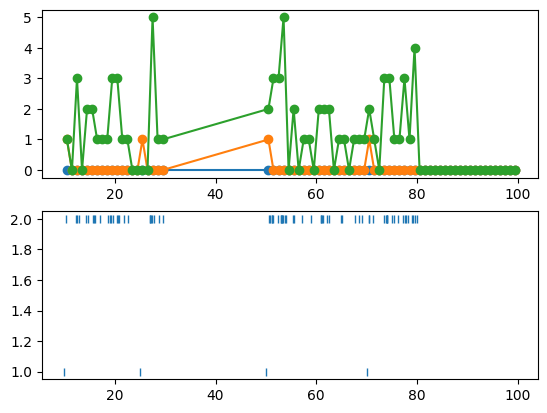

In [40]:
plt.figure()
ax = plt.subplot(211)
plt.plot(count, 'o-')
plt.subplot(212, sharex=ax)
plt.plot(tsgroup.restrict(ep_signal).to_tsd(), '|')

<div class="render-all">

From a set of timestamps, you want to assign them a set of values with the closest point in time of another time series.

**Question:** Using the function `value_from`, can you assign values to `ts2` from the `tsd1` time series and call the output `new_tsd`?

</div>

In [41]:
new_tsd = ts2.value_from(tsd1)

<div class="render-all">

**Question:** Can you plot together `tsd1`, `ts2` and `new_tsd`?

</div>

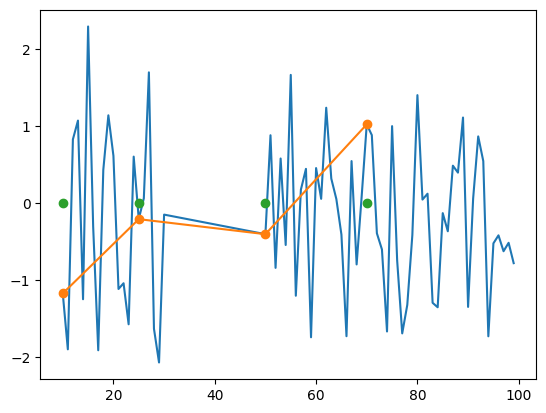

In [42]:
plt.figure()
plt.plot(tsd1)
plt.plot(new_tsd, 'o-')
plt.plot(ts2.fillna(0), 'o')

<div class="render-all">

One important aspect of data analysis is to bring data to the same size. Pynapple provides the `bin_average` function to downsample data.

**Question:** Can you downsample `tsd2` to one time point every 5 seconds?

</div>

In [43]:
new_tsd2 = tsd2.bin_average(5.0)

<div class="render-all">

**Question:** Can you plot the `tomato` column from `tsd2` as well as the downsampled version?

</div>

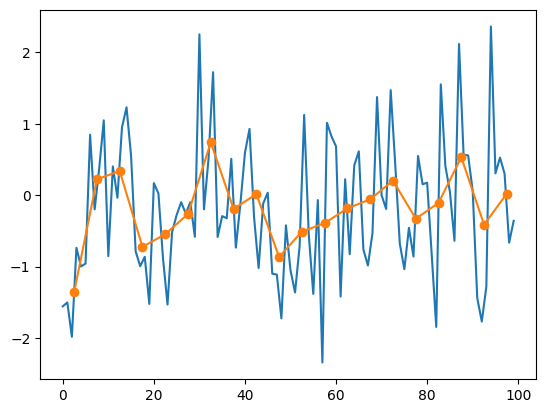

In [44]:
plt.figure()
plt.plot(tsd2['tomato'])
plt.plot(new_tsd2['tomato'], 'o-')

<div class="render-all">

For `tsd1`, you want to find all the epochs for which the value is above 0.0. Pynapple provides the function `threshold` to get 1 dimensional time series above or below a certain value.

**Question**: Can you print the epochs for which `tsd1` is above 0.0?
</div>

In [45]:
ep_above = tsd1.threshold(0.0).time_support

print(ep_above)

index    start    end
0        11.5     13.5
1        14.5     15.5
2        17.5     20.5
3        23.5     24.5
4        25.5     27.5
5        50.5     51.5
6        52.5     53.5
...      ...      ...
9        11.5     13.5
10       14.5     15.5
11       17.5     20.5
12       23.5     24.5
13       25.5     27.5
14       50.5     51.5
15       52.5     53.5
shape: (16, 2), time unit: sec.


<div class="render-all">

**Question**: can you plot `tsd1` as well as the epochs for which `tsd1` is above 0.0?
</div>

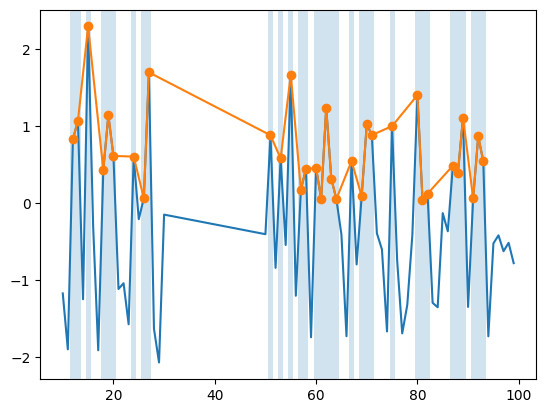

In [46]:
plt.figure()
plt.plot(tsd1)
plt.plot(tsd1.threshold(0.0), 'o-')
[plt.axvspan(s, e, alpha=0.2) for s,e in ep_above.values]

## Important

<div class="render-all">

**Question:** Does this work?
If not, please ask a TA.

</div>

In [47]:
import workshop_utils
path = workshop_utils.fetch_data("Mouse32-140822.nwb")
print(path)

/home/agent/workspace/rorse_ccn-software-jan-2025_main/lib/python3.11/data/Mouse32-140822.nwb
